In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_types = {
    'PD_DESC': 'category',
    'OFNS_DESC': 'category',
    'LAW_CODE': 'category',
    'LAW_CAT_CD': 'category',
    'ARREST_BORO': 'category',
    'ARREST_PRECINCT': 'category',
    'JURISDICTION_CODE': 'category',
    'AGE_GROUP': 'category',
    'PERP_SEX': 'category',
    'PERP_RACE': 'category'
}

ytd_df = pd.read_csv('cleaned_YTD_nypd_arrest_date.csv', dtype=data_types)

In [4]:
ytd_df['ARREST_DATE'] = pd.to_datetime(ytd_df['ARREST_DATE'])

In [5]:
ytd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63210 entries, 0 to 63209
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ARREST_DATE        63210 non-null  datetime64[ns]
 1   PD_DESC            63210 non-null  category      
 2   KY_CD              63210 non-null  float64       
 3   OFNS_DESC          63210 non-null  category      
 4   LAW_CODE           63210 non-null  category      
 5   LAW_CAT_CD         63210 non-null  category      
 6   ARREST_BORO        63210 non-null  category      
 7   ARREST_PRECINCT    63210 non-null  category      
 8   JURISDICTION_CODE  63210 non-null  category      
 9   AGE_GROUP          63210 non-null  category      
 10  PERP_SEX           63210 non-null  category      
 11  PERP_RACE          63210 non-null  category      
 12  Latitude           63210 non-null  float64       
 13  Longitude          63210 non-null  float64       
dtypes: cat

In [6]:
ytd_df.isna().sum()

ARREST_DATE          0
PD_DESC              0
KY_CD                0
OFNS_DESC            0
LAW_CODE             0
LAW_CAT_CD           0
ARREST_BORO          0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
PERP_SEX             0
PERP_RACE            0
Latitude             0
Longitude            0
dtype: int64

In [11]:
ytd_df.duplicated().sum()

5873

In [14]:
duplicate_rows = ytd_df[ytd_df.duplicated(keep=False)]
duplicate_rows.head(10)

,ARREST_DATE,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
6,2024-01-19,JOSTLING,230.0,JOSTLING,PL 1652501,Misdemeanor,Manhattan,6,0,25-44,Male,BLACK,40.737547,-74.000415
8,2024-01-31,RAPE 2,104.0,RAPE,PL 1303001,Felony,Bronx,41,0,18-24,Male,BLACK,40.816206,-73.896001
12,2024-01-26,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,Felony,Brooklyn,77,0,18-24,Male,BLACK,40.674593,-73.930572
27,2024-01-13,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,Felony,Manhattan,26,0,<18,Male,BLACK,40.814845,-73.956312
34,2024-01-29,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,Misdemeanor,Bronx,49,0,25-44,Female,BLACK,40.865997,-73.870438
36,2024-01-12,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,Misdemeanor,Manhattan,23,0,25-44,Male,BLACK,40.796073,-73.943485
39,2024-01-26,"LARCENY,GRAND OF AUTO",110.0,GRAND LARCENY OF MOTOR VEHICLE,PL 1553008,Felony,Queens,114,0,18-24,Male,BLACK HISPANIC,40.759373,-73.942047
42,2024-01-11,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,Misdemeanor,Queens,113,0,45-64,Male,BLACK,40.680077,-73.775929
46,2024-01-24,"LEWDNESS,PUBLIC",361.0,OFF. AGNST PUB ORD SENSBLTY &,PL 24500BI,Misdemeanor,Manhattan,18,0,25-44,Male,BLACK,40.765390,-73.985702
49,2024-01-17,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEF,PL 1651503,Misdemeanor,Bronx,44,1,25-44,Male,BLACK,40.827812,-73.925929


In [15]:
duplicate_rows = ytd_df[ytd_df.duplicated(subset=['ARREST_DATE', 'LAW_CODE'], keep=False)]

print("Duplicate rows based on 'ARREST_DATE' and 'LAW_CODE':")
print(duplicate_rows)


Duplicate rows based on 'ARREST_DATE' and 'LAW_CODE':
      ARREST_DATE                         PD_DESC  KY_CD  \
0      2024-01-10  ROBBERY,OPEN AREA UNCLASSIFIED  105.0   
2      2024-01-03                       ASSAULT 3  344.0   
3      2024-01-19  CONTROLLED SUBSTANCE, POSSESSI  235.0   
4      2024-01-11        ASSAULT 2,1,UNCLASSIFIED  106.0   
5      2024-02-01                          RAPE 1  104.0   
...           ...                             ...    ...   
63204  2024-03-08  FORGERY,ETC.,UNCLASSIFIED-FELO  113.0   
63205  2024-02-27  LARCENY,PETIT FROM OPEN AREAS,  341.0   
63206  2024-03-12  CONTROLLED SUBSTANCE, POSSESSI  235.0   
63207  2024-03-07  ROBBERY,OPEN AREA UNCLASSIFIED  105.0   
63209  2024-03-10            TRESPASS 3, CRIMINAL  352.0   

                          OFNS_DESC    LAW_CODE   LAW_CAT_CD    ARREST_BORO  \
0                           ROBBERY  PL 1601001       Felony      Manhattan   
2      ASSAULT 3 & RELATED OFFENSES  PL 1200001  Misdemeanor       

#### Despite duplicate sum count beeing 5,873 the rows displayed using the duplicate function display different Arrest Dates, PD Descriptions, and Offense description. Diving deeper only using Arrest Date and Law code it may look as if there are duplicates but the variating longitude and lattitude values suggest they are not duplicates

### Arrests by Month

In [21]:
ytd_df['ARREST_MONTH'] = ytd_df['ARREST_DATE'].dt.month
unique_months = ytd_df['ARREST_MONTH'].unique()
unique_months.sort()
print("Unique months listed in the ARREST_DATE column:")
print(unique_months)

Unique months listed in the ARREST_DATE column:
[1 2 3]


In [27]:
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']

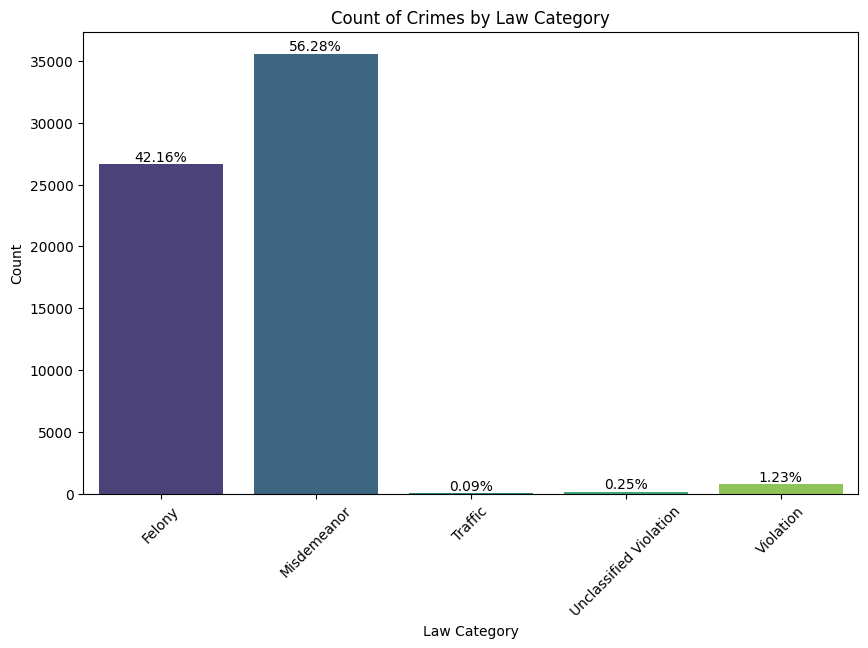

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=ytd_df, x='LAW_CAT_CD', order=law_cat_order, palette='viridis')
total_count = ytd_df.shape[0]
for p in ax.patches:
    percentage = (p.get_height() / total_count) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Crimes by Law Category')
plt.xlabel('Law Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

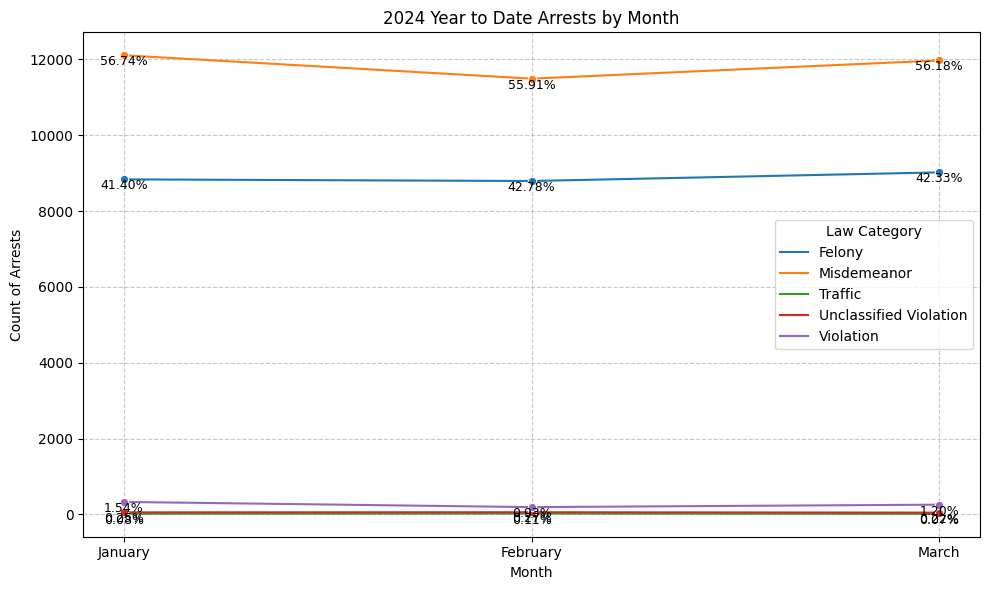

In [34]:
agg_df = ytd_df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
months_of_interest = [1, 2, 3]
agg_df = agg_df[agg_df['ARREST_MONTH'].isin(months_of_interest)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='count', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')

plt.title('2024 Year to Date Arrests by Month')
plt.xlabel('Month')
plt.ylabel('Count of Arrests')
month_labels = ['January', 'February', 'March']
plt.xticks(months_of_interest, month_labels)

plt.legend(title='Law Category')
total_counts = agg_df.groupby('ARREST_MONTH')['count'].sum()

for month in months_of_interest:
    if month in total_counts.index:
        total_count = total_counts.loc[month]
        subset_df = agg_df[agg_df['ARREST_MONTH'] == month]
        for _, row in subset_df.iterrows():
            percentage = (row['count'] / total_count) * 100
            plt.text(row['ARREST_MONTH'], row['count'], f'{percentage:.2f}%', ha='center', va='top', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Arrests By Borough

##### Bronx

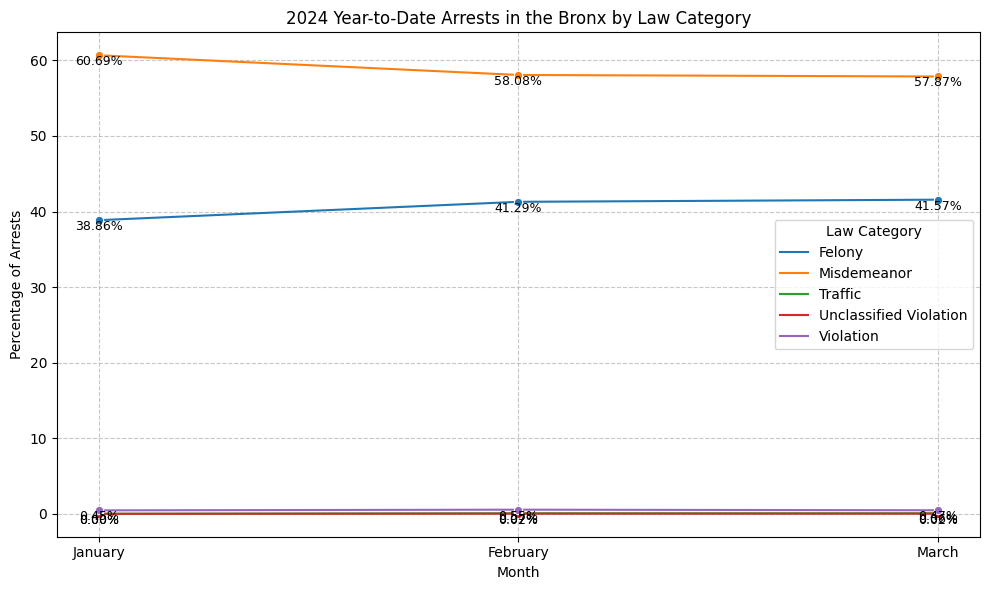

In [39]:
bronx_df = ytd_df[(ytd_df['ARREST_BORO'] == 'Bronx') & (ytd_df['ARREST_MONTH'].isin([1, 2, 3]))]
agg_df = bronx_df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')

total_counts = agg_df.groupby('ARREST_MONTH')['count'].sum().reset_index(name='total_count')
agg_df = agg_df.merge(total_counts, on='ARREST_MONTH')
agg_df['percentage'] = (agg_df['count'] / agg_df['total_count']) * 100
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
months_of_interest = [1, 2, 3]
month_names = ['January', 'February', 'March']
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='percentage', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
for month in months_of_interest:
    subset_df = agg_df[agg_df['ARREST_MONTH'] == month]
    for _, row in subset_df.iterrows():
        plt.text(row['ARREST_MONTH'], row['percentage'], f'{row["percentage"]:.2f}%', ha='center', va='top', fontsize=9)

plt.title('2024 Year-to-Date Arrests in the Bronx by Law Category')
plt.xlabel('Month')
plt.ylabel('Percentage of Arrests')
plt.xticks(months_of_interest, month_names)
plt.legend(title='Law Category')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Brooklyn

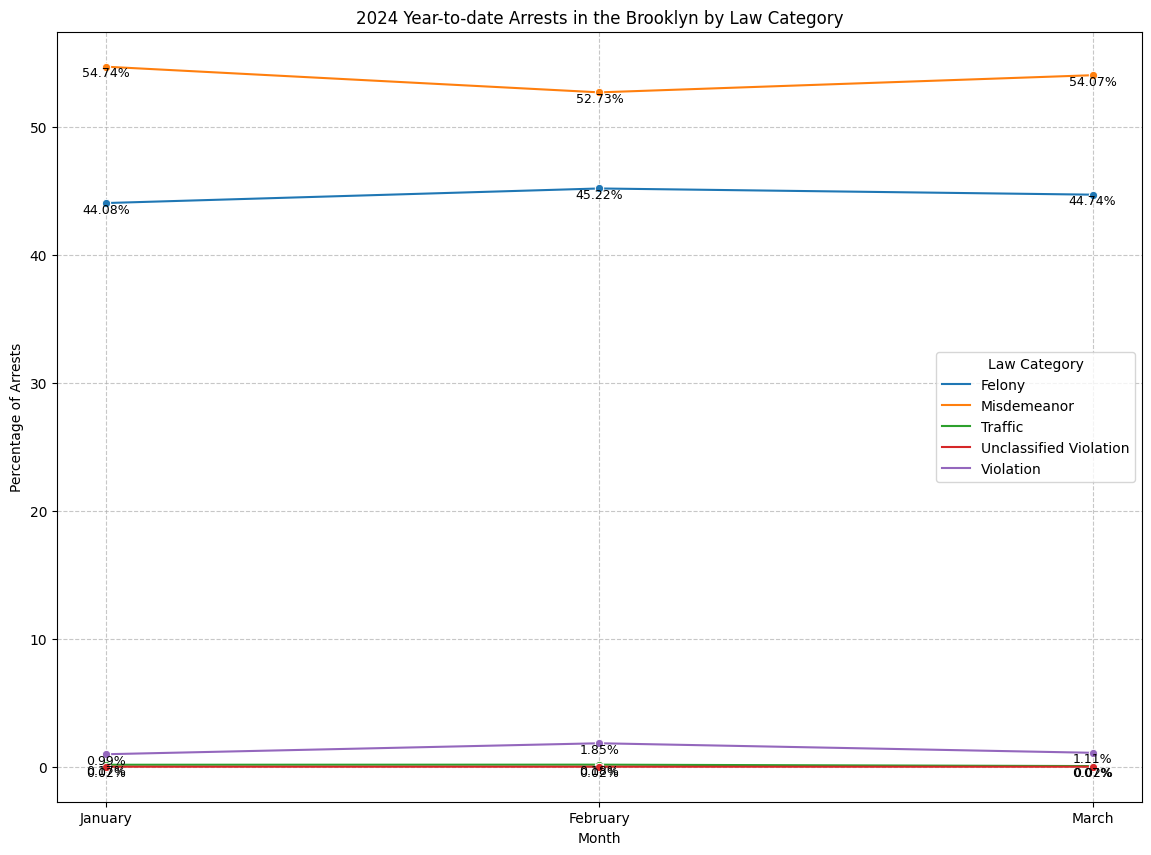

In [63]:
brooklyn_df = ytd_df[(ytd_df['ARREST_BORO'] == 'Brooklyn') & (ytd_df['ARREST_MONTH'].isin([1,2,3]))]
agg_df_2 = brooklyn_df.groupby(['ARREST_MONTH','LAW_CAT_CD']).size().reset_index(name='count')
total_count = agg_df_2.groupby('ARREST_MONTH')['count'].sum().reset_index(name='total_count')
agg_df_2 = agg_df_2.merge(total_count, on='ARREST_MONTH')
agg_df_2['percentage'] = (agg_df_2['count']/agg_df_2['total_count']) *100

plt.figure(figsize=(14,10))
sns.lineplot(data=agg_df_2, x='ARREST_MONTH', y='percentage', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
for month in months_of_interest:
    subset_df_2 =agg_df_2[agg_df_2['ARREST_MONTH']== month]
    for _, row in subset_df_2.iterrows():
        plt.text(row['ARREST_MONTH'], row['percentage'], f'{row["percentage"]:.2f}%', ha='center', va='top', fontsize=9)

plt.title('2024 Year-to-date Arrests in the Brooklyn by Law Category')
plt.xlabel('Month')
plt.ylabel('Percentage of Arrests')
plt.xticks(months_of_interest, month_names)
plt.legend(title='Law Category')
plt.grid(True, linestyle='--', alpha=0.7)